In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
import random

import numpy as np
import pandas as pd
import pylab as plt
import datetime
import sys

sys.path.append("../../fitsne/")
from fast_ctsne import fast_ctsne as fastc_tsne

sys.path.append("../../ctsne/")
from bhtsne import run_bh_tsne as ctsne

sys.path.append("../")
import plot_utils
import evaluation


In [2]:
output_folder = f"./{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}"
os.mkdir(output_folder)

data_folder = "synthetic"
figure_folder = output_folder

emb_config = {
    "theta": 0.2,
    "max_iter": 750,
    "perplexity": 30,
    "keep_nonzero": 3,
    "seed": 42,
}

seed=6
np.random.seed(seed)
random.seed(seed)

## Data

In [3]:
data_df = pd.read_csv("synthetic_dataset.csv")
data_df.head()

prior_col = "batch"
label_col = "celltype"

X = np.asarray(data_df.iloc[:, 3:13])
Y = np.asarray(data_df[prior_col])
data_df = data_df[[prior_col, label_col]]
emb = {}

data_dict = {'X': X,
             'Y': Y}
palette = {0: '#1f77b4',
           1: '#ff7f0e'}

## t-SNE

In [4]:
beta = 1.0
emb["tsne"] = ctsne(X, labels=Y, beta=beta, verbose=True, **emb_config)
tsne_results = evaluation.evaluate_embedding(
    emb["tsne"],
    metadata_df=data_df,
    data_dict=data_dict,
    n_neigh=emb_config['perplexity'],
    prior_col=prior_col,
    secondary_col=label_col,
    evaluation_measures=["rnx", "laplacian"],
    sampling_frac=None,
    wandb_log=False,
)
tsne_results = pd.DataFrame(data={"x": emb["tsne"][:, 0], "y": emb["tsne"][:, 1]}).join(
    tsne_results
)
tsne_results.head()


alpha = 1.000000, beta = 1.000000


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


1.000000 1.000000 2 1500 10 0.200000 30.000000 2 750 3
Read the 1500 x 10 data matrix successfully!
Using random seed: 42
Using no_dims = 2, perplexity = 30.000000, and theta = 0.200000
Computing input similarities...
Using K = 90 neighbors for every point.Building tree...
 - point 0 of 1500
Input similarities computed in 0.10 seconds (sparsity = 0.077966)!
Learning embedding...
Iteration 50: error is 67.422018 (50 iterations in 0.98 seconds)
Iteration 100: error is 60.932162 (50 iterations in 0.57 seconds)
Iteration 150: error is 59.958541 (50 iterations in 0.49 seconds)
Iteration 200: error is 59.511359 (50 iterations in 0.50 seconds)
Iteration 250: error is 2.453938 (50 iterations in 0.48 seconds)
Iteration 300: error is 1.452438 (50 iterations in 0.58 seconds)
Iteration 350: error is 1.175173 (50 iterations in 0.61 seconds)
Iteration 400: error is 1.060128 (50 iterations in 0.57 seconds)
Iteration 450: error is 0.998252 (50 iterations in 0.54 seconds)
Iteration 500: error is 0.9636

100%|██████████| 1500/1500 [00:01<00:00, 1329.53it/s]


,x,y,batch,celltype,laplacian,laplacian_celltype,k
0,-9.924910,-37.163212,0,0,0.0,0.0,30
1,-24.017297,-32.860643,0,0,0.0,0.0,30
2,-13.286237,-25.352770,0,0,0.0,0.0,30
3,-18.520162,-26.446241,0,0,0.0,0.0,30
4,-14.466528,-27.576769,0,0,0.0,0.0,30


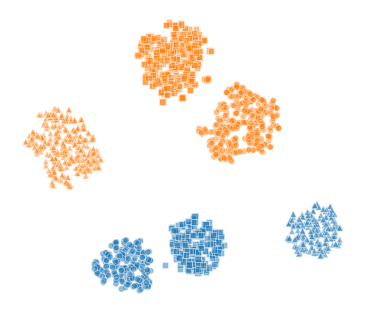

In [5]:
ax = plot_utils.plot_embedding(
    embedding_df=tsne_results, color_col=prior_col, shape_col=label_col,
    palette=palette, markers=["o", "s", "^"]
)
plt.savefig(
    os.path.join(figure_folder, f"synthetic_tsne.png"),
    dpi=300,
    bbox_inches="tight",
)

## Conditional t-SNE

In [6]:
beta = 1e-4
emb["ctsne"] = ctsne(X, labels=Y, beta=beta, verbose=True, **emb_config)
ctsne_results = evaluation.evaluate_embedding(
    emb["ctsne"],
    metadata_df=data_df,
    data_dict=data_dict,
    n_neigh=emb_config['perplexity'],
    prior_col=prior_col,
    secondary_col=label_col,
    evaluation_measures=["rnx", "laplacian"],
    sampling_frac=None,
    wandb_log=False,
)
ctsne_results = pd.DataFrame(
    data={"x": emb["ctsne"][:, 0], "y": emb["ctsne"][:, 1]}
).join(ctsne_results)

alpha = 1.924169, beta = 0.000100
1.924169 0.000100 2 1500 10 0.200000 30.000000 2 750 3
Read the 1500 x 10 data matrix successfully!
Using random seed: 42
Using no_dims = 2, perplexity = 30.000000, and theta = 0.200000
Computing input similarities...
Using K = 90 neighbors for every point.Building tree...
 - point 0 of 1500
Input similarities computed in 0.10 seconds (sparsity = 0.077966)!
Learning embedding...
Iteration 50: error is 70.791010 (50 iterations in 1.23 seconds)
Iteration 100: error is 67.007328 (50 iterations in 0.56 seconds)
Iteration 150: error is 66.516735 (50 iterations in 0.50 seconds)
Iteration 200: error is 66.354815 (50 iterations in 0.52 seconds)
Iteration 250: error is 3.036925 (50 iterations in 0.52 seconds)
Iteration 300: error is 1.893417 (50 iterations in 0.70 seconds)
Iteration 350: error is 1.697149 (50 iterations in 0.74 seconds)
Iteration 400: error is 1.626956 (50 iterations in 0.68 seconds)
Iteration 450: error is 1.591794 (50 iterations in 0.70 secon

100%|██████████| 1500/1500 [00:01<00:00, 1263.41it/s]


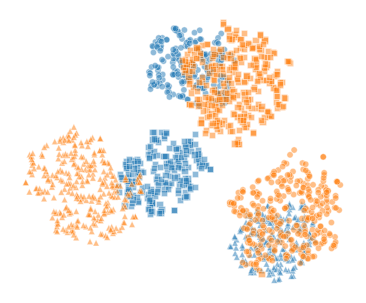

In [7]:
ax = plot_utils.plot_embedding(
    embedding_df=ctsne_results, color_col=prior_col, shape_col=label_col,
    palette=palette, markers=["o", "s", "^"]
)
plt.savefig(
    os.path.join(figure_folder, f"synthetic_ctsne.png"),
    dpi=300,
    bbox_inches="tight",
)

## Revised Conditional t-SNE

In [8]:
# in the paper we flip 'alpha' and 'beta' for revised ct-SNE but in the code it 
# is not flipped and 'alpha' is the value that decreases the same-labeled similarities
alpha = 1e-20
emb["rev_ctsne"] = fastc_tsne(
    X, labels=Y, alpha=alpha, fixed_perp=False, print_output=True, **emb_config
)
rev_ctsne_results = evaluation.evaluate_embedding(
    emb["rev_ctsne"],
    metadata_df=data_df,
    data_dict=data_dict,
    n_neigh=emb_config['perplexity'],
    prior_col=prior_col,
    secondary_col=label_col,
    evaluation_measures=["rnx", "laplacian"],
    sampling_frac=None,
    wandb_log=False,
)
rev_ctsne_results = pd.DataFrame(
    data={"x": emb["rev_ctsne"][:, 0], "y": emb["rev_ctsne"][:, 1]}
).join(rev_ctsne_results)


alpha = 0.000000, beta = 2.081944
=============== t-SNE v1.2.1 ===============
fast_tsne data_path: data_2023-02-16 11:16:52.713892-613579658.dat
fast_tsne result_path: result_2023-02-16 11:16:52.713892-613579658.dat
fast_tsne nthreads: 12
Parameter settings:
	 dataset size 	1500 by 10
	 theta		0.200000
	 perplexity	30.000000
	 no_dims	2
	 max_iter	750
	 momentum	0.500000
	 final_momentum	0.800000
	 learning_rate	200.000000
	 max_step_norm	5.000000
	 K		-1
	 keep_nonzero	3
	 sigma		-1.000000
	 nbody_algo	2
	 knn_algo	1
	 n_trees	50
	 search_k	4500
	 nterms		3
	 t-dist df	1.000000
	 interval_per_integer	1.000000
	 min_num_intervals	50
	 stop_lying_iter	250
	 mom_switch_iter	250
	 early_exag_coeff	12.000000
	 no_momentum_during_exag 0
	 start_late_exag_iter	-1
	 late_exag_coeff	-1.000000
	 hd_tdist	0
	 hd_df	1.000000
	 fixed_perp	0
Conditional parameters: 
	 num_label_vals	2
	 alpha		0.000000
	 beta		2.081944
Read the 1500 x 10 data matrix successfully. X[0,0] = 1.224981
Read the labels 

100%|██████████| 1500/1500 [00:01<00:00, 1313.71it/s]


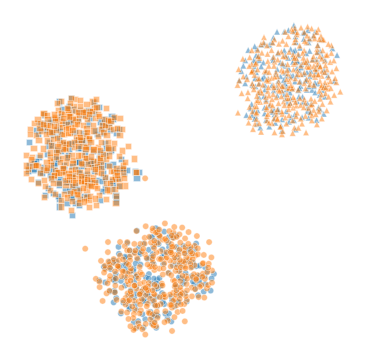

In [9]:
ax = plot_utils.plot_embedding(
    embedding_df=rev_ctsne_results, color_col=prior_col, shape_col=label_col,
    palette=palette, markers=["o", "s", "^"]
)
plt.savefig(
    os.path.join(figure_folder, f"synthetic_revised_ctsne.png"),
    dpi=300,
    bbox_inches="tight",
)